In [1]:
import pandas as pd
from dataprep.eda import plot,plot_missing
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.features.pca import PCADecomposition
import warnings
import squarify
warnings.filterwarnings("ignore")

NumExpr defaulting to 4 threads.


C:\Users\pedro\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Import and Describe the Dataset

In [2]:
df = pd.read_csv('fifa2019.csv')

In [3]:
lista_final = {}

In [4]:
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [5]:
df.shape

(18207, 89)

In [6]:
X = df._get_numeric_data()
plot_missing(X)

# Data Cleaning and Transformation

In [7]:
X[X.isnull().any(axis=1)].head()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
5018,5018,153160,37,70,70,1574,1.0,3.0,2.0,NaN,...,77.0,64.0,79.0,70.0,70.0,16.0,8.0,11.0,12.0,13.0
6736,6736,175393,33,68,68,1664,1.0,3.0,3.0,NaN,...,69.0,67.0,12.0,34.0,33.0,16.0,13.0,15.0,16.0,8.0
7922,7922,195905,33,67,67,1619,1.0,3.0,2.0,NaN,...,42.0,54.0,72.0,71.0,64.0,11.0,7.0,8.0,12.0,12.0
9905,9905,226044,23,66,69,1632,1.0,4.0,3.0,NaN,...,67.0,64.0,19.0,24.0,23.0,13.0,11.0,11.0,7.0,9.0
10628,10628,216751,26,65,66,1536,1.0,2.0,2.0,NaN,...,39.0,57.0,68.0,69.0,68.0,14.0,12.0,11.0,14.0,12.0


In [8]:
X = X.drop(columns=['Jersey Number'])

In [9]:
X[X.isnull().any(axis=1)].head()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Crossing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
13236,13236,177971,33,62,62,1510,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13237,13237,195380,29,62,62,1532,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13238,13238,139317,35,62,62,1573,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13239,13239,240437,20,62,72,1610,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13240,13240,209462,24,62,66,1481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
X = X.dropna()

In [11]:
df = df.loc[(df['ID'].isin(X['ID'])),:]

In [12]:
X.columns

Index(['Unnamed: 0', 'ID', 'Age', 'Overall', 'Potential', 'Special',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes'],
      dtype='object')

# Group by position [GK,DEF,MID,ATTACK]

In [13]:
X = X.drop(columns=['Unnamed: 0', 'ID', 'Age', 'Overall', 'Potential', 'Special','International Reputation'])
hierarchical = AgglomerativeClustering(n_clusters=4, affinity='correlation', linkage='complete')
hierarchical.fit(X)
df['labels'] = hierarchical.labels_
df['labels'].unique()

array([2, 1, 3, 0], dtype=int64)

In [14]:
def plot_pos(df,n):
    values = df.query(f'labels == {n}')['Position'].value_counts()
    squarify.plot(values, label=values.index,pad=True, alpha=.6 )

* Set df to defense 

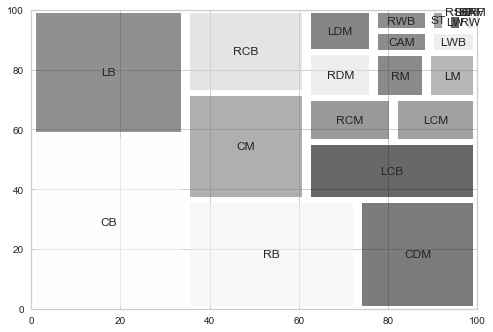

In [15]:
plot_pos(df,0)

In [16]:
df_defesa = df.query('labels == 0')

* Set df to goalkeeper

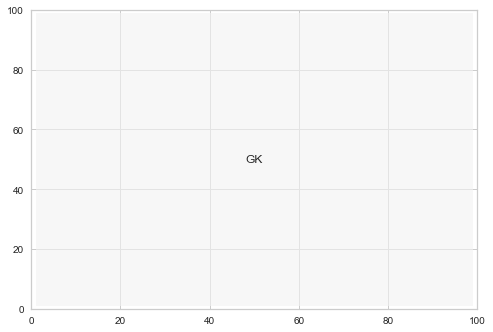

In [17]:
plot_pos(df,1)

In [18]:
df_goleiro = df.query('labels == 1')

* Set df to Attack

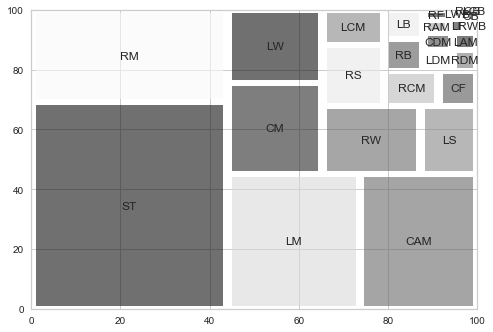

In [19]:
plot_pos(df,2)

In [20]:
df_ataque = df.query('labels == 2')

* Set df to Midfielder

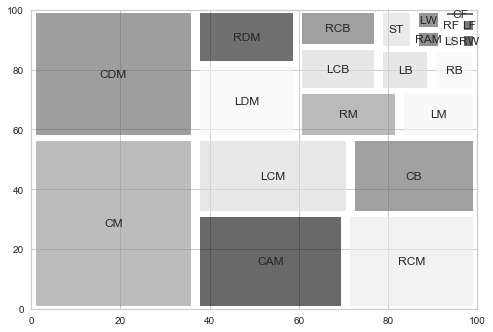

In [21]:
plot_pos(df,3)

In [22]:
df_meio = df.query('labels == 3')

# Functions

* Get numeric columns

In [23]:
def get_numeric(df):
    X = df._get_numeric_data()
    X = X.drop(columns=['Unnamed: 0', 'ID', 'Age', 'Overall', 'Potential', 'Special','International Reputation','Jersey Number'])
    return X

* Function to cleaning and transform df per position

In [24]:
def create_df_resume(df_position,x):
    mask = (~df['ID'].isin(df_position['ID']))
    df_compare = df.loc[mask,:]._get_numeric_data()
    df_compare.drop(columns=['Unnamed: 0', 'ID', 'Age', 'Overall', 'Potential', 'Special','International Reputation','Jersey Number','labels'], inplace=True)
    df_base = df_position._get_numeric_data()
    df_base.drop(columns=['Unnamed: 0', 'ID', 'Age', 'Overall', 'Potential', 'Special','International Reputation','Jersey Number','labels'], inplace=True)
    remove=[df_base.drop(columns=[item],inplace = True) for item in df_base.columns if df_base.mean()[item] < (df_compare.mean()[item])*x]
    return df_base

* Function to generate PCA Decompose and cluster by KMeans

In [25]:
def ger_pca_kluster(df_input,N_cluster):
    X_std = StandardScaler().fit_transform(df_input)
    pca = PCA(2)
    X_t = pca.fit_transform(X_std)
    pca.explained_variance_ratio_.sum()
    visualizer = PCADecomposition(scale=False, proj_features=True)
    visualizer.fit_transform(pd.DataFrame(X_std, columns=df_input.columns))
    visualizer.show()
    cluster = KMeans(n_clusters=N_cluster,random_state=42).fit(X_std)
    labels= cluster.labels_
    sns.scatterplot(X_t[:, 0], X_t[:, 1], hue=labels,s=50, palette='viridis', legend='full')
    return labels

* Agglomerative Clustering

In [65]:
def aglomerative(x_input,N):
    hierarchical = AgglomerativeClustering(n_clusters=N, affinity='correlation', linkage='complete')
    hierarchical.fit(x_input)
    labels = hierarchical.labels_
    return labels

# Goalkeeper

In [27]:
df_1 = create_df_resume(df_goleiro,1)

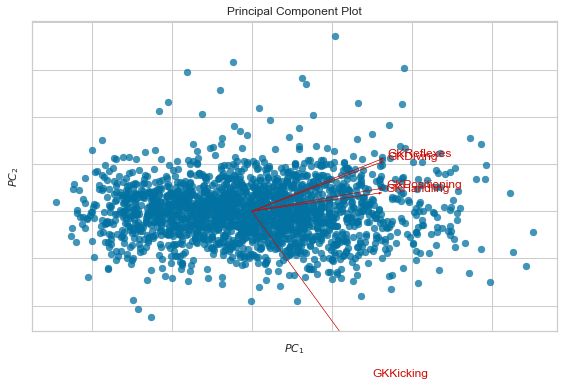

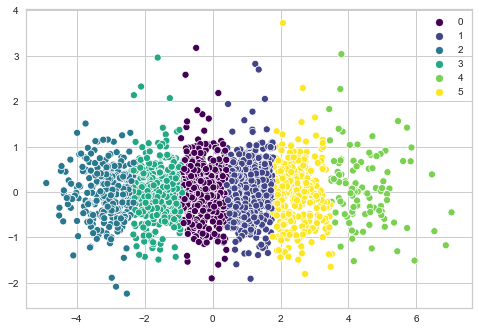

In [28]:
labels = ger_pca_kluster(df_1,6)

In [29]:
df_goleiro['labels'] = labels
df_goleiros_best = df_goleiro.query('labels == 4')

In [30]:
df_1 = create_df_resume(df_goleiros_best,1)

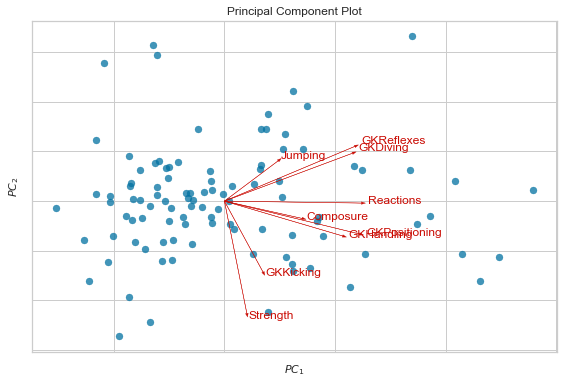

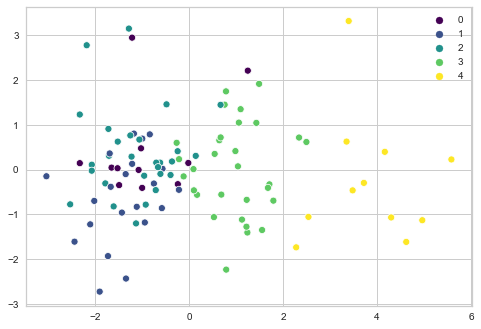

In [31]:
labels = ger_pca_kluster(df_1,5)

In [32]:
df_goleiros_best['label'] = labels
df_goleiros_best.query('label == 4')

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,labels,label
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M,4,4
9,9,200389,J. Oblak,25,https://cdn.sofifa.org/players/4/19/200389.png,Slovenia,https://cdn.sofifa.org/flags/44.png,90,93,Atlético Madrid,...,12.0,18.0,86.0,92.0,78.0,88.0,89.0,€144.5M,4,4
18,18,192448,M. ter Stegen,26,https://cdn.sofifa.org/players/4/19/192448.png,Germany,https://cdn.sofifa.org/flags/21.png,89,92,FC Barcelona,...,13.0,10.0,87.0,85.0,88.0,85.0,90.0,€123.3M,4,4
19,19,192119,T. Courtois,26,https://cdn.sofifa.org/players/4/19/192119.png,Belgium,https://cdn.sofifa.org/flags/7.png,89,90,Real Madrid,...,18.0,16.0,85.0,91.0,72.0,86.0,88.0,€113.7M,4,4
22,22,167495,M. Neuer,32,https://cdn.sofifa.org/players/4/19/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,89,89,FC Bayern München,...,10.0,11.0,90.0,86.0,91.0,87.0,87.0,€62.7M,4,4
37,37,167948,H. Lloris,31,https://cdn.sofifa.org/players/4/19/167948.png,France,https://cdn.sofifa.org/flags/18.png,88,88,Tottenham Hotspur,...,10.0,18.0,88.0,84.0,68.0,83.0,92.0,€66.6M,4,4
40,40,162835,S. Handanovič,33,https://cdn.sofifa.org/players/4/19/162835.png,Slovenia,https://cdn.sofifa.org/flags/44.png,88,88,Inter,...,10.0,13.0,87.0,86.0,69.0,89.0,89.0,€51M,4,4
41,41,1179,G. Buffon,40,https://cdn.sofifa.org/players/4/19/1179.png,Italy,https://cdn.sofifa.org/flags/27.png,88,88,Paris Saint-Germain,...,11.0,11.0,88.0,87.0,74.0,90.0,83.0,€7.4M,4,4
46,46,193041,K. Navas,31,https://cdn.sofifa.org/players/4/19/193041.png,Costa Rica,https://cdn.sofifa.org/flags/72.png,87,87,Real Madrid,...,14.0,14.0,90.0,81.0,75.0,82.0,90.0,€62.5M,4,4
57,57,210257,Ederson,24,https://cdn.sofifa.org/players/4/19/210257.png,Brazil,https://cdn.sofifa.org/flags/54.png,86,90,Manchester City,...,15.0,8.0,85.0,80.0,91.0,82.0,87.0,€79.9M,4,4


In [33]:
lista_final['goleiros'] = list(df_goleiros_best.query('label == 2')['Name'])

# Defense

## Center backs

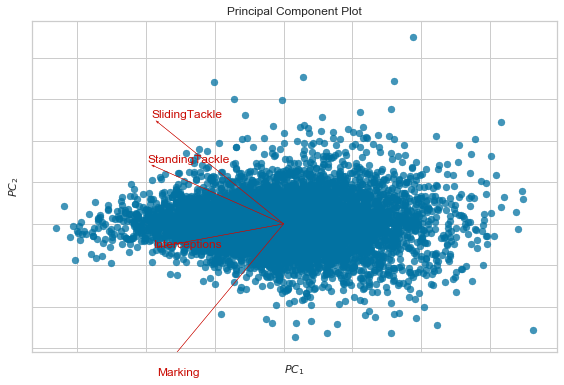

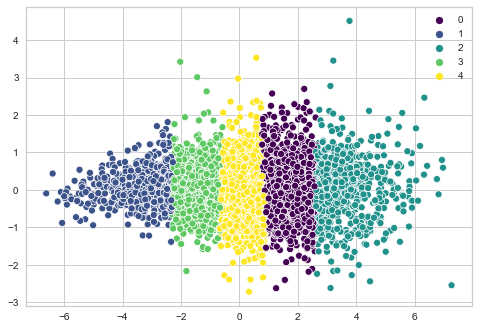

In [109]:
df_1 = create_df_resume(df_defesa,1.5)
labels = ger_pca_kluster(df_1,5)

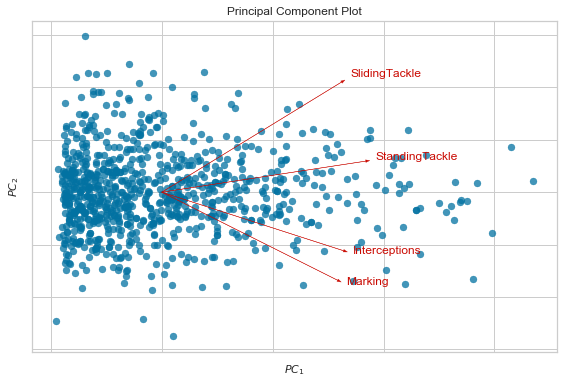

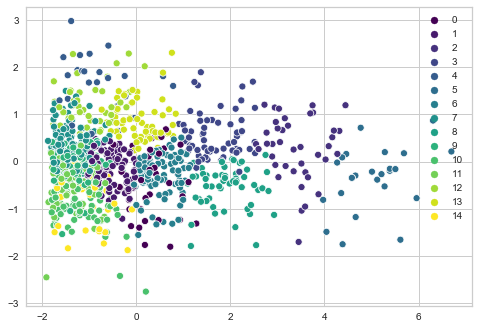

In [110]:
df_defesa['labels'] = labels
df_def_best = df_defesa.query('labels == 1')
df_1 = create_df_resume(df_def_best,1.5)
labels = ger_pca_kluster(df_1,15)

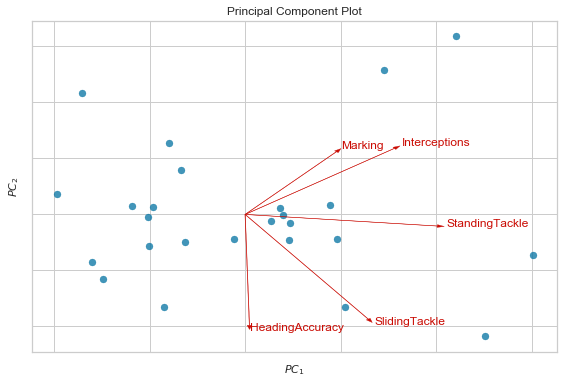

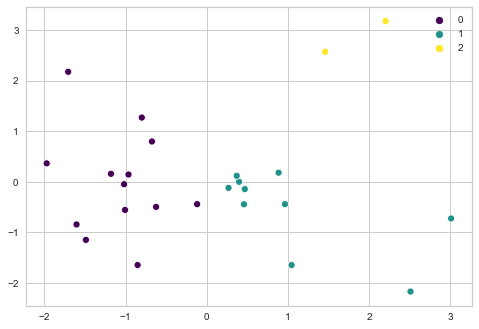

In [111]:
df_def_best['labels']=labels
df_def_best1 = df_def_best.query('labels == 5')
df_1 = create_df_resume(df_def_best1,1.5)
labels = ger_pca_kluster(df_1,3)

In [115]:
df_def_best1['labels']=labels
df_def_best1.query('labels==1')

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,labels
8,8,155862,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,91,91,Real Madrid,...,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,€104.6M,1
12,12,182493,D. Godín,32,https://cdn.sofifa.org/players/4/19/182493.png,Uruguay,https://cdn.sofifa.org/flags/60.png,90,90,Atlético Madrid,...,90.0,89.0,89.0,6.0,8.0,15.0,5.0,15.0,€90.2M,1
24,24,138956,G. Chiellini,33,https://cdn.sofifa.org/players/4/19/138956.png,Italy,https://cdn.sofifa.org/flags/27.png,89,89,Juventus,...,93.0,93.0,90.0,3.0,3.0,2.0,4.0,3.0,€44.6M,1
27,27,200145,Casemiro,26,https://cdn.sofifa.org/players/4/19/200145.png,Brazil,https://cdn.sofifa.org/flags/54.png,88,90,Real Madrid,...,88.0,90.0,87.0,13.0,14.0,16.0,12.0,12.0,€126.4M,1
39,39,164240,Thiago Silva,33,https://cdn.sofifa.org/players/4/19/164240.png,Brazil,https://cdn.sofifa.org/flags/54.png,88,88,Paris Saint-Germain,...,88.0,89.0,85.0,9.0,12.0,5.0,9.0,10.0,€44.4M,1
42,42,205600,S. Umtiti,24,https://cdn.sofifa.org/players/4/19/205600.png,France,https://cdn.sofifa.org/flags/18.png,87,92,FC Barcelona,...,90.0,89.0,86.0,15.0,10.0,14.0,12.0,15.0,€121.1M,1
44,44,201024,K. Koulibaly,27,https://cdn.sofifa.org/players/4/19/201024.png,Senegal,https://cdn.sofifa.org/flags/136.png,87,90,Napoli,...,91.0,88.0,86.0,7.0,11.0,7.0,13.0,5.0,€90.5M,1
51,51,172871,J. Vertonghen,31,https://cdn.sofifa.org/players/4/19/172871.png,Belgium,https://cdn.sofifa.org/flags/7.png,87,87,Tottenham Hotspur,...,90.0,87.0,88.0,6.0,10.0,9.0,12.0,7.0,€62.9M,1
69,69,184432,Azpilicueta,28,https://cdn.sofifa.org/players/4/19/184432.png,Spain,https://cdn.sofifa.org/flags/45.png,86,86,Chelsea,...,88.0,90.0,86.0,13.0,9.0,10.0,6.0,5.0,€64.8M,1
71,71,184087,T. Alderweireld,29,https://cdn.sofifa.org/players/4/19/184087.png,Belgium,https://cdn.sofifa.org/flags/7.png,86,87,Tottenham Hotspur,...,90.0,91.0,86.0,16.0,6.0,14.0,16.0,14.0,€75.1M,1


In [116]:
lista_final['center_backs'] = list(df_def_best1.query('labels==1'))

## Right and Left back

In [63]:
df_zagueiro['Position']

12        CB
24       LCB
27       CDM
44       LCB
51       LCB
        ... 
18133     CB
18165     CB
18168     CB
18179     CB
18201     RB
Name: Position, Length: 3083, dtype: object

In [64]:
df_lateral['Position']

8        RCB
14       LDM
20       CDM
39       RCB
42        CB
        ... 
18195     CM
18196     CM
18199     CM
18202     CM
18206     CM
Name: Position, Length: 5568, dtype: object

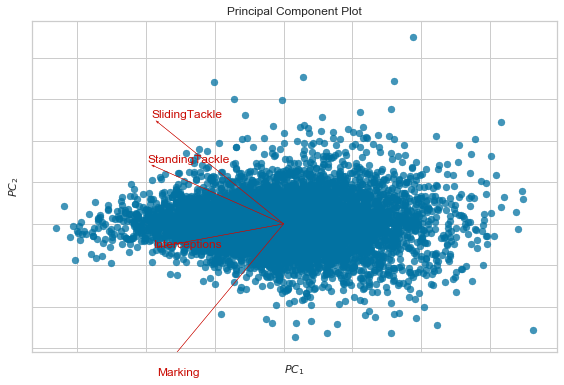

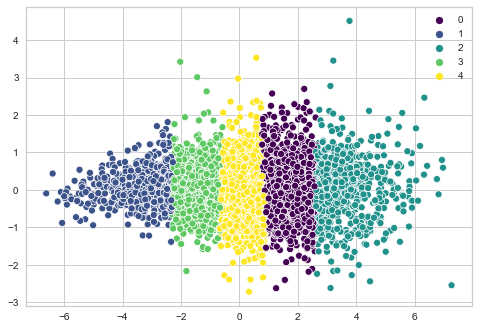

In [74]:
df_1 = create_df_resume(df_defesa,1.5)
labels = ger_pca_kluster(df_1,5)

In [45]:
df_lateral['labels'] = labels
df_lateral_best = df_lateral.query('labels == 1')

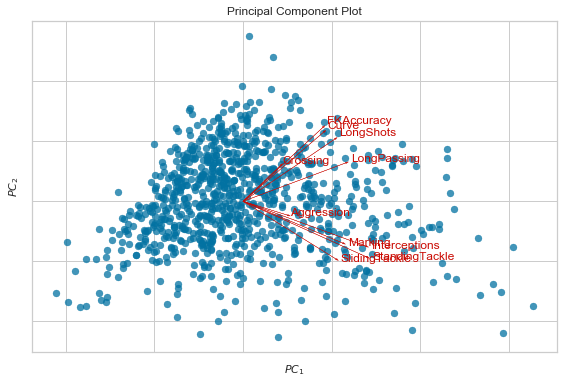

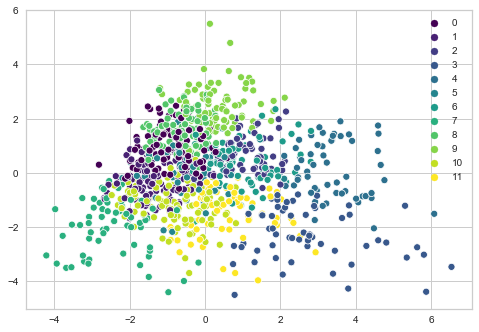

In [60]:
df_1 = create_df_resume(df_lateral_best,1.3)
labels = ger_pca_kluster(df_1,12)

In [59]:
df_lateral_best['labels'] = labels
df_lateral_best.query('labels == 10')['Position']

8      RCB
14     LDM
20     CDM
39     RCB
42      CB
69      RB
75     CDM
101    CAM
103     LM
118    CDM
190    RCM
198    RDM
216     RB
235    LCM
410    LCB
533    LCB
Name: Position, dtype: object

In [ ]:
lista_final['goleiros'] = list(df_goleiros_best.query('label == 2')['Name'])